<a href="https://colab.research.google.com/github/kartalozbalkanli/Traffic-Analysis-Project/blob/main/DSA_Project_Phase_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

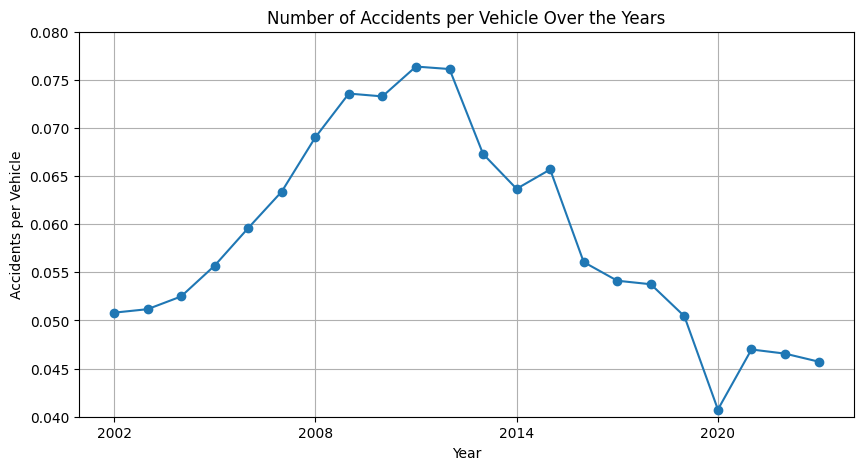

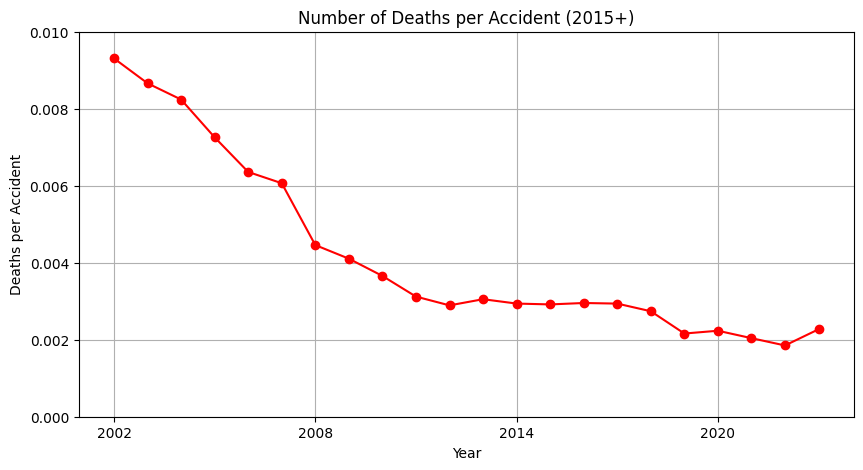

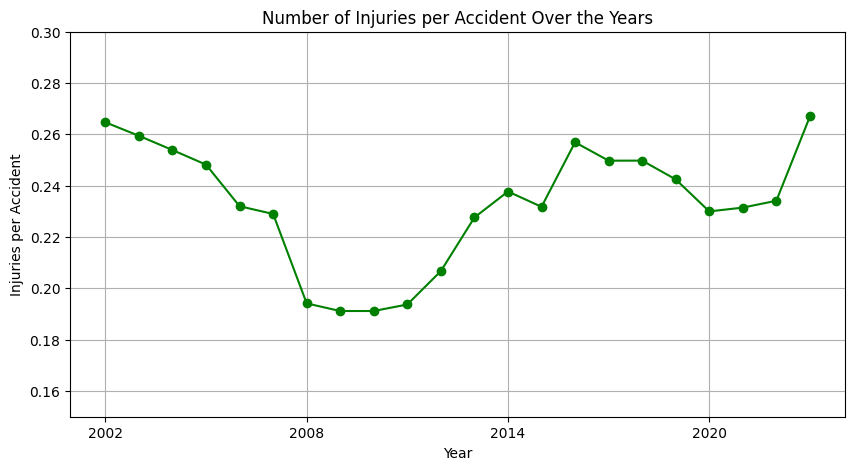

ACCIDENTS PER VEHICLE:
Minimum rate of accidents per vehicle: 0.04074606861411521
Maximum rate of accidents per vehicle: 0.07638061228396507
Mean before 2015: 0.06404078110031187
Mean after 2015: 0.051122843773686644
Difference between means: -0.012917937326625231
Std dev before 2015: 0.009459407313590941
Std dev after 2015: 0.007312708410178602 

DEATHS PER ACCIDENT:
Minimum rate of deaths per accident: 0.0018508350250657567
Maximum rate of deaths per accident: 0.009306989678859968
Mean before 2015: 0.005393015838183288
Mean after 2015: 0.002456105279608589
Difference between means: -0.0029369105585746987
Std dev before 2015: 0.0023702147622526423
Std dev after 2015: 0.00043061177593134827 

INJURIES PER ACCIDENT:
Minimum rate of injuries per accident: 0.19118124528882247
Maximum rate of injuries per accident: 0.2669853044129375
Mean before 2015: 0.22535856957180853
Mean after 2015: 0.2437017416772691
Difference between means: 0.018343172105460576
Std dev before 2015: 0.02726406833327

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind

df1 = pd.read_csv('vehicles_population.csv', delimiter=';')
df2 = pd.read_csv('accident_death.csv', delimiter=';')

# Merge dataframes on year
df = pd.merge(df1, df2, on='year')

# Columns to convert to numeric
cols_to_numeric = ['total_vehicle','total_accidents','dead_at_scene','injured','year']

for col in cols_to_numeric:
    df[col] = df[col].astype(str).str.replace(' ', '').str.strip()
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Calculating Safety Metrics
df['accidents_per_vehicle'] = df['total_accidents'] / df['total_vehicle']
df['injuries_per_accident'] = df['injured'] / df['total_accidents']
df['deaths_per_accident'] = df['dead_at_scene'] / df['total_accidents']

# Plotting number of accidents per vehicle over the years
plt.figure(figsize=(10, 5))
plt.xticks(np.arange(2002, 2024, 6))
plt.ylim(0.04,0.08)
plt.plot(df['year'], df['accidents_per_vehicle'], marker='o')
plt.title('Number of Accidents per Vehicle Over the Years')
plt.xlabel('Year')
plt.ylabel('Accidents per Vehicle')
plt.grid(True)
plt.show()

# Plotting number of deaths per accident over the years (2015+)
plt.figure(figsize=(10, 5))
plt.xticks(np.arange(2002, 2024, 6))
plt.ylim(0,0.01)
plt.plot(df['year'], df['deaths_per_accident'], marker='o', color='red')
plt.title('Number of Deaths per Accident (2015+)')
plt.xlabel('Year')
plt.ylabel('Deaths per Accident')
plt.grid(True)
plt.show()

# Plotting number of injuries per accident
plt.figure(figsize=(10, 5))
plt.xticks(np.arange(2002, 2024, 6))
plt.ylim(0.15,0.3)
plt.plot(df['year'], df['injuries_per_accident'], marker='o', color='green')
plt.title('Number of Injuries per Accident Over the Years')
plt.xlabel('Year')
plt.ylabel('Injuries per Accident')
plt.grid(True)
plt.show()

# STATISTICS

# Accidents per vehicle statistics
min_accidents = df['accidents_per_vehicle'].min()
max_accidents = df['accidents_per_vehicle'].max()

before_acc = df[df['year'] < 2015]['accidents_per_vehicle']
now_acc = df[df['year'] >= 2015]['accidents_per_vehicle']

mean_before = sum(before_acc) / len(before_acc)
mean_now = sum(now_acc) / len(now_acc)

var_before = sum((x - mean_before)**2 for x in before_acc) / (len(before_acc) - 1)
var_now = sum((x - mean_now)**2 for x in now_acc) / (len(now_acc) - 1)

std_before = var_before**0.5
std_now = var_now**0.5

print("ACCIDENTS PER VEHICLE:")
print("Minimum rate of accidents per vehicle:", min_accidents)
print("Maximum rate of accidents per vehicle:", max_accidents)
print("Mean before 2015:", mean_before)
print("Mean after 2015:", mean_now)
print("Difference between means:", mean_now - mean_before)
print("Std dev before 2015:", std_before)
print("Std dev after 2015:", std_now, "\n")

# Deaths per accident statistics
min_deaths = df['deaths_per_accident'].min()
max_deaths = df['deaths_per_accident'].max()

before_death = df[df['year'] < 2015]['deaths_per_accident']
now_death = df[df['year'] >= 2015]['deaths_per_accident']

mean_before = sum(before_death) / len(before_death)
mean_now = sum(now_death) / len(now_death)

var_before = sum((x - mean_before)**2 for x in before_death) / (len(before_death) - 1)
var_now = sum((x - mean_now)**2 for x in now_death) / (len(now_death) - 1)

std_before = var_before**0.5
std_now = var_now**0.5

print("DEATHS PER ACCIDENT:")
print("Minimum rate of deaths per accident:", min_deaths)
print("Maximum rate of deaths per accident:", max_deaths)
print("Mean before 2015:", mean_before)
print("Mean after 2015:", mean_now)
print("Difference between means:", mean_now - mean_before)
print("Std dev before 2015:", std_before)
print("Std dev after 2015:", std_now, "\n")

# Injuries per accident statistics
min_injuries = df['injuries_per_accident'].min()
max_injuries = df['injuries_per_accident'].max()

before_injury = df[df['year'] < 2015]['injuries_per_accident']
now_injury = df[df['year'] >= 2015]['injuries_per_accident']

mean_before = sum(before_injury) / len(before_injury)
mean_now = sum(now_injury) / len(now_injury)

var_before = sum((x - mean_before)**2 for x in before_injury) / (len(before_injury) - 1)
var_now = sum((x - mean_now)**2 for x in now_injury) / (len(now_injury) - 1)

std_before = var_before**0.5
std_now = var_now**0.5

print("INJURIES PER ACCIDENT:")
print("Minimum rate of injuries per accident:", min_injuries)
print("Maximum rate of injuries per accident:", max_injuries)
print("Mean before 2015:", mean_before)
print("Mean after 2015:", mean_now)
print("Difference between means:", mean_now - mean_before)
print("Std dev before 2015:", std_before)
print("Std dev after 2015:", std_now, "\n\n\n")


# -HYPOTHESIS TESTING-
print("HYPOTHESIS TESTING:")

# We take years between 2002-2014 as before and years between 2015-2023 as now
split_year = 2015
pre = df[df['year'] < split_year]
post = df[df['year'] >= split_year]

# Accidents per vehicle
t1, p1 = ttest_ind(pre['accidents_per_vehicle'], post['accidents_per_vehicle'], equal_var=False, alternative="greater")

# Deaths per accident
t2, p2 = ttest_ind(pre['deaths_per_accident'], post['deaths_per_accident'], equal_var=False, alternative="greater")

# Injuries per accident
t3, p3 = ttest_ind(pre['injuries_per_accident'], post['injuries_per_accident'], equal_var=False, alternative="greater")

print("Accidents per vehicle: t =", t1, "p =", p1)
print("Deaths per accident: t =", t2, "p =", p2)
print("Injuries per accident: t =", t3, "p =", p3)

alpha = 0.05
for name, p in zip(
    ["Accidents per vehicle", "Deaths per accident", "Injuries per accident"],
    [p1, p2, p3]
):
    if p < alpha:
        print(f"[{name}] --> Significant difference (p = {p:.4f}) → Reject H₀")
    else:
        print(f"[{name}] --> No significant difference (p = {p:.4f}) → Fail to reject H₀")